## Time Series Analysis: Home Assignment 1

due to **11.02.21 23:00**

You need to upload HA1 to github repository,  the link will be provided later.

Enter your name below: 

In [1]:
name='Lysenko Stepan' 

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)
    
    $1.2$ Check NAs (1 pt.)
    
    $1.3$ Transform dates (2 pt.)
    
    $1.4$. Make some plots (0.75 pt.)
    
    $1.5$ Split the data (0.75 pt.)
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)
    
    $2.2$ Point forecasts (1 pt.)
    
    $2.3$ Interval forecasts 1 (1 pt.)
    
    $2.4$ Interval forecasts 2 (1 pt.)
    
    $2.5$ Forecast quality metrics (2 pt.)
    
    $2.6$ Model comparison (1 pt.)
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [4]:
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error

### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [5]:
#code here (1 pt.)
df=pd.read_csv('https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv')

### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [6]:
# code here (0.5 pt.)
print(df.isnull().value_counts())

sales  month  day    year 
False  False  False  False    147
dtype: int64


How many missing values are there in ``` df ```?

In [7]:
# answer (0.5 pt.)
print(df.isnull().sum())

sales    0
month    0
day      0
year     0
dtype: int64


### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [8]:
# answer (0.5 pt.)
print('Years, monthes and days are represented apart in the different columns')

Years, monthes and days are represented apart in the different columns


Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [9]:
# code here (0.5 pt.)
df['date']=df['year']*10000+df['month']*100+df['day']*1
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')
print(df)

       sales  month  day  year       date
0    134.710     10   31  2020 2020-10-31
1    137.740      7   31  2020 2020-07-31
2    134.620      4   30  2020 2020-04-30
3    141.670      1   31  2020 2020-01-31
4    127.990     10   31  2019 2019-10-31
..       ...    ...  ...   ...        ...
142    1.656      4   30  1985 1985-04-30
143    2.074      1   31  1985 1985-01-31
144    1.584     10   31  1984 1984-10-31
145    1.508      7   31  1984 1984-07-31
146    1.235      4   30  1984 1984-04-30

[147 rows x 5 columns]


Change index to dates:

``` df.index=.... ```

In [10]:
# code here (0.25 pt.)
df.index=pd.to_datetime(df['date'])
print(df)

              sales  month  day  year       date
date                                            
2020-10-31  134.710     10   31  2020 2020-10-31
2020-07-31  137.740      7   31  2020 2020-07-31
2020-04-30  134.620      4   30  2020 2020-04-30
2020-01-31  141.670      1   31  2020 2020-01-31
2019-10-31  127.990     10   31  2019 2019-10-31
...             ...    ...  ...   ...        ...
1985-04-30    1.656      4   30  1985 1985-04-30
1985-01-31    2.074      1   31  1985 1985-01-31
1984-10-31    1.584     10   31  1984 1984-10-31
1984-07-31    1.508      7   31  1984 1984-07-31
1984-04-30    1.235      4   30  1984 1984-04-30

[147 rows x 5 columns]


What is the size of the dataset?

use ```.shape```

In [11]:
# code here (0.25 pt.)
print(df.shape)

(147, 5)


Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [12]:
# code here (0.25 pt.)
df=df.drop(['day', 'year','month', 'date'], axis=1)

print(df)

              sales
date               
2020-10-31  134.710
2020-07-31  137.740
2020-04-30  134.620
2020-01-31  141.670
2019-10-31  127.990
...             ...
1985-04-30    1.656
1985-01-31    2.074
1984-10-31    1.584
1984-07-31    1.508
1984-04-30    1.235

[147 rows x 1 columns]


What is the size of the dataset now?

In [13]:
# code here (0.25 pt.)
print(df.shape)

(147, 1)


### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```

In [14]:
# code here (0.25 pt.)
y=pd.Series(df['sales'])
print(y)

date
2020-10-31    134.710
2020-07-31    137.740
2020-04-30    134.620
2020-01-31    141.670
2019-10-31    127.990
               ...   
1985-04-30      1.656
1985-01-31      2.074
1984-10-31      1.584
1984-07-31      1.508
1984-04-30      1.235
Name: sales, Length: 147, dtype: float64


```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [15]:
# code here (0.25 pt.)
y=np.flip(y)

print(y)

date
1984-04-30      1.235
1984-07-31      1.508
1984-10-31      1.584
1985-01-31      2.074
1985-04-30      1.656
               ...   
2019-10-31    127.990
2020-01-31    141.670
2020-04-30    134.620
2020-07-31    137.740
2020-10-31    134.710
Name: sales, Length: 147, dtype: float64


Plot the series using ```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

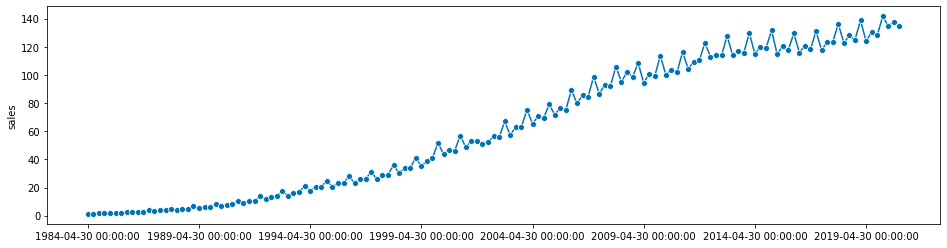

In [16]:
# code here (0.25 pt.)
plot_series(y)


### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [17]:
# code here (0.5 pt.)
y_train, y_test = temporal_train_test_split(y, test_size=0.2)

plot train and test samples using ``` plot_series ```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

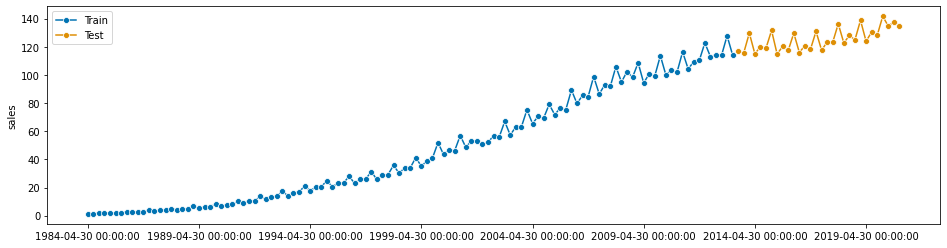

In [18]:
# code here (0.25 pt.)
plot_series(y_train, y_test, labels=['Train', 'Test'])

## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [24]:
# code here (0.5 pt.)
model_MAA = ETSModel(y_train, error='mul', trend='add', seasonal='add', seasonal_periods=4)
fit_MAA=model_MAA.fit()
print(fit_MAA.summary())

C:\min\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


                                 ETS Results                                  
Dep. Variable:                  sales   No. Observations:                  117
Model:                       ETS(MAA)   Log Likelihood                -177.074
Date:                Thu, 11 Feb 2021   AIC                            374.147
Time:                        04:46:33   BIC                            401.769
Sample:                    04-30-1984   HQIC                           385.361
                         - 04-30-2013   Scale                            0.002
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.3363      0.080      4.186      0.000       0.179       0.494
smoothing_trend        0.1333      0.035      3.864      0.000       0.066       0.201
smoothing_seasonal  

Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [26]:
# code here (0.5 pt.)
model_AAM = ETSModel(y_train, error='add', trend='add', seasonal='mul', seasonal_periods=4)
fit_AAM=model_AAM.fit()
print(fit_AAM.summary())

                                 ETS Results                                  
Dep. Variable:                  sales   No. Observations:                  117
Model:                       ETS(AAM)   Log Likelihood                -241.169
Date:                Thu, 11 Feb 2021   AIC                            502.338
Time:                        04:48:54   BIC                            529.960
Sample:                    04-30-1984   HQIC                           513.552
                         - 04-30-2013   Scale                            3.613
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.5437      0.107      5.076      0.000       0.334       0.754
smoothing_trend        0.0429      0.020      2.098      0.036       0.003       0.083
smoothing_seasonal  

C:\min\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [320]:
# code here (0.25 pt.)
fit_MAA.forecast(steps=30)

2013-07-31    105.090172
2013-10-31     92.621749
2014-01-31     80.698328
2014-04-30     66.994900
2014-07-31     58.012482
2014-10-31     45.544058
2015-01-31     33.620638
2015-04-30     19.917210
2015-07-31     10.934792
2015-10-31     -1.533632
2016-01-31    -13.457053
2016-04-30    -27.160481
2016-07-31    -36.142899
2016-10-31    -48.611323
2017-01-31    -60.534743
2017-04-30    -74.238171
2017-07-31    -83.220589
2017-10-31    -95.689013
2018-01-31   -107.612433
2018-04-30   -121.315861
2018-07-31   -130.298279
2018-10-31   -142.766703
2019-01-31   -154.690124
2019-04-30   -168.393552
2019-07-31   -177.375970
2019-10-31   -189.844394
2020-01-31   -201.767814
2020-04-30   -215.471242
2020-07-31   -224.453660
2020-10-31   -236.922084
Freq: Q-OCT, Name: simulation, dtype: float64

Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [321]:
# code here (0.25 pt.)
fit_AAM.forecast(steps=30)

2013-07-31    119.244484
2013-10-31    117.867104
2014-01-31    133.457518
2014-04-30    118.815419
2014-07-31    124.107456
2014-10-31    122.625392
2015-01-31    138.791358
2015-04-30    123.517087
2015-07-31    128.970429
2015-10-31    127.383680
2016-01-31    144.125199
2016-04-30    128.218756
2016-07-31    133.833402
2016-10-31    132.141968
2017-01-31    149.459040
2017-04-30    132.920425
2017-07-31    138.696374
2017-10-31    136.900257
2018-01-31    154.792881
2018-04-30    137.622094
2018-07-31    143.559347
2018-10-31    141.658545
2019-01-31    160.126721
2019-04-30    142.323762
2019-07-31    148.422319
2019-10-31    146.416833
2020-01-31    165.460562
2020-04-30    147.025431
2020-07-31    153.285292
2020-10-31    151.175122
Freq: Q-OCT, Name: simulation, dtype: float64

Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='simulation'>)

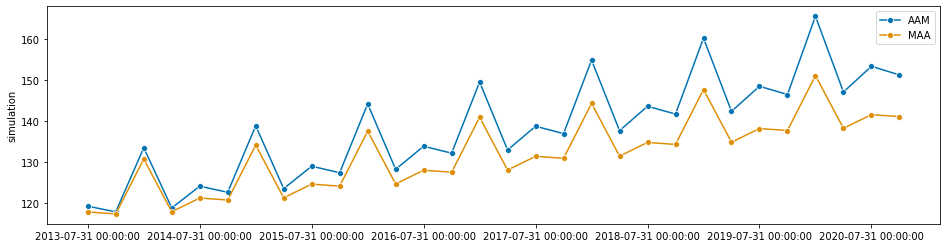

In [27]:
# code here (0.5 pt.)
plot_series(fit_AAM.forecast(steps=30), fit_MAA.forecast(steps=30), labels= ['AAM','MAA'] )

### 2.3 Interval forecasts ETS(MAA) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [60]:
# code here (0.5 pt.)
pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')

pred_MAA=pred_MAA.summary_frame(alpha=0.05)
lower_int=pred_MAA.pi_lower
upper_int=pred_MAA.pi_upper
pred_MAA = pred_MAA.rename(columns={'pi_lower': 'lower_int', 'pi_upper': 'upper_int'})
pred_MAA
                         

,mean,mean_numerical,lower_int,upper_int
2013-07-31,117.848870,118.184553,108.519334,127.759244
2013-10-31,117.364670,117.437089,106.820046,128.117325
2014-01-31,130.725436,130.901648,118.512252,143.713138
2014-04-30,117.901779,118.223984,104.563124,132.883479
2014-07-31,121.230476,121.748055,102.312839,140.516477
2014-10-31,120.746277,120.925476,99.070765,142.788992
2015-01-31,134.107042,134.435025,111.500762,161.607886
2015-04-30,121.283386,121.860429,94.622175,149.673336
2015-07-31,124.612082,125.064534,91.763007,158.476536
2015-10-31,124.127883,124.276968,88.470902,161.882424


Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='pi_upper'>)

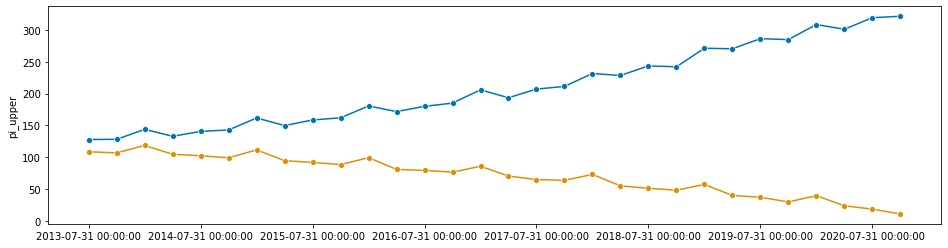

In [62]:
# code here (0.5 pt.)
plot_series(upper_int, lower_int)

### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [63]:
# code here (0.5 pt.)
pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')

pred_AAM=pred_AAM.summary_frame(alpha=0.05)
lower_int=pred_AAM.pi_lower
upper_int=pred_AAM.pi_upper
pred_AAM = pred_AAM.rename(columns={'pi_lower': 'lower_int', 'pi_upper': 'upper_int'})
pred_AAM


,mean,mean_numerical,lower_int,upper_int
2013-07-31,119.244350,119.218939,115.529342,122.800788
2013-10-31,117.867089,117.671387,113.396693,122.046424
2014-01-31,133.457338,133.338269,128.249866,138.333349
2014-04-30,118.815402,118.757414,113.406320,124.147515
2014-07-31,124.107285,123.916285,117.247530,130.244123
2014-10-31,122.625346,122.380915,115.091876,129.179041
2015-01-31,138.791137,138.722609,130.223717,146.615735
2015-04-30,123.517040,123.466673,115.481484,131.176803
2015-07-31,128.970221,128.860077,119.281537,137.944202
2015-10-31,127.383603,127.232243,117.380239,136.656075


Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='pi_upper'>)

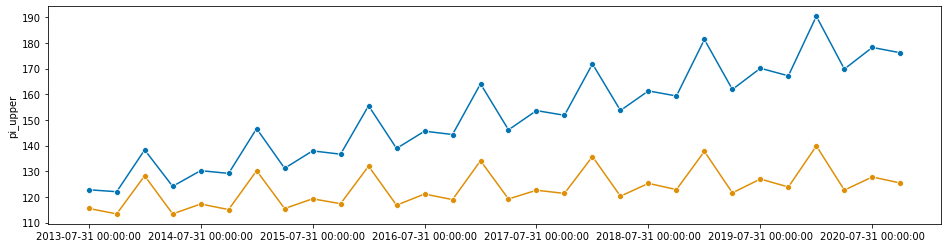

In [64]:
# code here (0.5 pt.)
plot_series(upper_int, lower_int)

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [57]:
# code here (0.5 pt.) MAA
import sklearn.metrics as skmet
skmet.mean_absolute_error(y_test, fit_MAA.forecast(steps=30))

6.39454141486733

In [58]:
# code here (0.5 pt.) AAM
skmet.mean_absolute_error(y_test, fit_AAM.forecast(steps=30))

12.709275358816642

$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [68]:
# code here (0.5 pt.) MAA
skmet.mean_squared_error(y_test, fit_MAA.forecast(steps=30))

50.57139369674357

In [70]:
# code here (0.5 pt.) AAM
skmet.mean_squared_error(y_test, fit_AAM.forecast(steps=30))

195.9739616889944

$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [71]:
# code here (0.5 pt.)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Calculate MAPE:

In [74]:
# code here (0.25 pt.) MAA
mean_absolute_percentage_error(y_test, fit_MAA.forecast(steps=30))

5.091696961546188

In [75]:
# code here (0.25 pt.) AAM
mean_absolute_percentage_error(y_test, fit_AAM.forecast(steps=30))

9.993612476660727

### 2.6 What is the best model according to the metrics above? (1 pt.)

In [77]:
# code here (1 pt.)
'MAA is better'

'MAA is better'